In [101]:
import pandas as pd

In [103]:
import seaborn as sns

In [105]:
import zipfile

In [107]:
import kaggle

In [5]:
!kaggle datasets download aiaiaidavid/the-big-dataset-of-ultra-marathon-running

Dataset URL: https://www.kaggle.com/datasets/aiaiaidavid/the-big-dataset-of-ultra-marathon-running
License(s): CC0-1.0




  0%|          | 0.00/246M [00:00<?, ?B/s]
 69%|######8   | 169M/246M [00:00<00:00, 1.76GB/s]
100%|##########| 246M/246M [00:00<00:00, 1.86GB/s]


In [11]:
file_name = 'the-big-dataset-of-ultra-marathon-running.zip'
with zipfile.ZipFile(file_name, 'r') as file:
    file.extractall()

In [109]:
df = pd.read_csv('TWO_CENTURIES_OF_UM_RACES.csv')

C:\Users\marci\AppData\Local\Temp\ipykernel_4676\107228863.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('TWO_CENTURIES_OF_UM_RACES.csv')


In [110]:
df.shape

(7461195, 13)

In [111]:
df.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete club                  object
Athlete country               object
Athlete year of birth        float64
Athlete gender                object
Athlete age category          object
Athlete average speed         object
Athlete ID                     int64
dtype: object

In [112]:
# Checking all events that happened in Poland in 100km distance and above 2010 year

In [113]:
df2 = df[(df['Event distance/length'].isin(['100km'])) & (df['Year of event'] >= 2010) & (df['Event name'].str.split('(').str.get(1).str.split(')').str.get(0) == 'POL')]

In [114]:
# Removing (POL) from Event name, as there are only events that happened in Poland

In [115]:
df2['Event name'] = df2["Event name"].str.replace(r"\(POL\)", "", regex=True).str.strip()

C:\Users\marci\AppData\Local\Temp\ipykernel_4676\3805811722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Event name'] = df2["Event name"].str.replace(r"\(POL\)", "", regex=True).str.strip()


In [116]:
# Creating athlete age column

In [117]:
df2['athlete_age'] = 2025 - df2['Athlete year of birth']

C:\Users\marci\AppData\Local\Temp\ipykernel_4676\2025543158.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['athlete_age'] = 2025 - df2['Athlete year of birth']


In [118]:
df2.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,athlete_age
20173,2018,16.-17.03.2018,"Setka Komandosa, Lubliniec - Kokotek",100km,167,8:55:24 h,7 Brygada Obrony Wybrz...,POL,1978.0,M,M40,11.207,19370,47.0
20174,2018,16.-17.03.2018,"Setka Komandosa, Lubliniec - Kokotek",100km,167,9:54:24 h,Rmf4Rt OCR,POL,1982.0,M,M35,10.094,19371,43.0
20175,2018,16.-17.03.2018,"Setka Komandosa, Lubliniec - Kokotek",100km,167,10:10:52 h,15 Giżycka Brygada Zme...,POL,1984.0,M,M23,9.822,19372,41.0
20176,2018,16.-17.03.2018,"Setka Komandosa, Lubliniec - Kokotek",100km,167,10:11:48 h,Muay Running Team,POL,1978.0,M,M35,9.807,19373,47.0
20177,2018,16.-17.03.2018,"Setka Komandosa, Lubliniec - Kokotek",100km,167,10:37:23 h,16 BPD,POL,1979.0,M,M35,9.413,19374,46.0


In [119]:
# Removing 'h' from Athlete performance column

In [120]:
df2['Athlete performance'] = df2['Athlete performance'].str.split(' ').str.get(0)

C:\Users\marci\AppData\Local\Temp\ipykernel_4676\2477507555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Athlete performance'] = df2['Athlete performance'].str.split(' ').str.get(0)


In [121]:
df2.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,athlete_age
20173,2018,16.-17.03.2018,"Setka Komandosa, Lubliniec - Kokotek",100km,167,8:55:24,7 Brygada Obrony Wybrz...,POL,1978.0,M,M40,11.207,19370,47.0
20174,2018,16.-17.03.2018,"Setka Komandosa, Lubliniec - Kokotek",100km,167,9:54:24,Rmf4Rt OCR,POL,1982.0,M,M35,10.094,19371,43.0
20175,2018,16.-17.03.2018,"Setka Komandosa, Lubliniec - Kokotek",100km,167,10:10:52,15 Giżycka Brygada Zme...,POL,1984.0,M,M23,9.822,19372,41.0
20176,2018,16.-17.03.2018,"Setka Komandosa, Lubliniec - Kokotek",100km,167,10:11:48,Muay Running Team,POL,1978.0,M,M35,9.807,19373,47.0
20177,2018,16.-17.03.2018,"Setka Komandosa, Lubliniec - Kokotek",100km,167,10:37:23,16 BPD,POL,1979.0,M,M35,9.413,19374,46.0


In [122]:
# Dropping columns: Athlete Club, Athlete Country, Athlete year of birth, Athlete age category

In [123]:
df2 = df2.drop(['Athlete club','Athlete country','Athlete year of birth','Athlete age category'], axis = 1)

In [124]:
# Checking possible null values
# If there are null values, we will drop them

In [125]:
df2.isna().sum()

Year of event                  0
Event dates                    0
Event name                     0
Event distance/length          0
Event number of finishers      0
Athlete performance            0
Athlete gender                 0
Athlete average speed          0
Athlete ID                     0
athlete_age                  488
dtype: int64

In [126]:
df2[df2['athlete_age'].isna()==1]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age
307968,2018,12.05.2018,Ultramaraton Podkarpacki 50km,50km,165,4:24:59,M,11.321,211726,NaN
307972,2018,12.05.2018,Ultramaraton Podkarpacki 50km,50km,165,4:31:44,M,11.04,211730,NaN
307973,2018,12.05.2018,Ultramaraton Podkarpacki 50km,50km,165,4:32:53,M,10.994,211731,NaN
307979,2018,12.05.2018,Ultramaraton Podkarpacki 50km,50km,165,4:53:51,M,10.209,211737,NaN
307988,2018,12.05.2018,Ultramaraton Podkarpacki 50km,50km,165,5:13:20,M,9.574,211744,NaN
...,...,...,...,...,...,...,...,...,...,...
6556963,2015,08.08.2015,Ultramaraton Chudy Wawrzyniec 50 Km,50km,573,12:27:32,M,4.013,1493090,NaN
6556964,2015,08.08.2015,Ultramaraton Chudy Wawrzyniec 50 Km,50km,573,12:31:42,M,3.991,1493091,NaN
6556968,2015,08.08.2015,Ultramaraton Chudy Wawrzyniec 50 Km,50km,573,12:52:13,M,3.885,1493092,NaN
6556969,2015,08.08.2015,Ultramaraton Chudy Wawrzyniec 50 Km,50km,573,13:07:32,M,3.809,1493093,NaN


In [127]:
df2 = df2.dropna()

In [128]:
df2.isna().sum()

Year of event                0
Event dates                  0
Event name                   0
Event distance/length        0
Event number of finishers    0
Athlete performance          0
Athlete gender               0
Athlete average speed        0
Athlete ID                   0
athlete_age                  0
dtype: int64

In [129]:
# Fixing columns datatype

In [130]:
df2.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete gender                object
Athlete average speed         object
Athlete ID                     int64
athlete_age                  float64
dtype: object

In [131]:
df2['athlete_age'] = df2['athlete_age'].astype(int)

In [132]:
# df2['Athlete average speed'] = df2['Athlete average speed'].astype(float)
# This prints out an error "could not convert string to float: '12:00:00'"
# We will fix that by dropping all rows containing time string inside ['Athlete average speed']

In [133]:
invalid_entries = df2[~df2['Athlete average speed'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]
print(invalid_entries['Athlete average speed'].unique())

[]


In [134]:
df2 = df2[df2['Athlete average speed'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]

In [135]:
df2['Athlete average speed'] = df2['Athlete average speed'].astype(float)

In [136]:
# Fixed the Athlete average speed column by dropping rows with time string

In [137]:
df2.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete gender                object
Athlete average speed        float64
Athlete ID                     int64
athlete_age                    int32
dtype: object

In [138]:
# Renaming columns

In [139]:
df2 = df2.rename(columns = {'Year of event': 'event_year',
                                'Event dates': 'race_day',
                                'Event name': 'race_name',
                                'Event distance/length': 'race_length',
                                'Event number of finishers': 'race_number_of_finishers',
                                'Athlete performance': 'athlete_performance',
                                'Athlete gender': 'athlete_gender',
                                'Athlete average speed':'athlete_average_speed',
                                'Athlete ID': 'athlete_id'  
})

In [140]:
df2.head()

,event_year,race_day,race_name,race_length,race_number_of_finishers,athlete_performance,athlete_gender,athlete_average_speed,athlete_id,athlete_age
20173,2018,16.-17.03.2018,"Setka Komandosa, Lubliniec - Kokotek",100km,167,8:55:24,M,11.207,19370,47
20174,2018,16.-17.03.2018,"Setka Komandosa, Lubliniec - Kokotek",100km,167,9:54:24,M,10.094,19371,43
20175,2018,16.-17.03.2018,"Setka Komandosa, Lubliniec - Kokotek",100km,167,10:10:52,M,9.822,19372,41
20176,2018,16.-17.03.2018,"Setka Komandosa, Lubliniec - Kokotek",100km,167,10:11:48,M,9.807,19373,47
20177,2018,16.-17.03.2018,"Setka Komandosa, Lubliniec - Kokotek",100km,167,10:37:23,M,9.413,19374,46


In [141]:
# Fixing race_day column date format

In [142]:
df2['race_day'] = df2['race_day'].str.split('-').str.get(1)

In [143]:
df2.isna().sum()

event_year                     0
race_day                    8923
race_name                      0
race_length                    0
race_number_of_finishers       0
athlete_performance            0
athlete_gender                 0
athlete_average_speed          0
athlete_id                     0
athlete_age                    0
dtype: int64

In [144]:
df2 = df2.dropna()

In [145]:
df2

,event_year,race_day,race_name,race_length,race_number_of_finishers,athlete_performance,athlete_gender,athlete_average_speed,athlete_id,athlete_age
20173,2018,17.03.2018,"Setka Komandosa, Lubliniec - Kokotek",100km,167,8:55:24,M,11.207,19370,47
20174,2018,17.03.2018,"Setka Komandosa, Lubliniec - Kokotek",100km,167,9:54:24,M,10.094,19371,43
20175,2018,17.03.2018,"Setka Komandosa, Lubliniec - Kokotek",100km,167,10:10:52,M,9.822,19372,41
20176,2018,17.03.2018,"Setka Komandosa, Lubliniec - Kokotek",100km,167,10:11:48,M,9.807,19373,47
20177,2018,17.03.2018,"Setka Komandosa, Lubliniec - Kokotek",100km,167,10:37:23,M,9.413,19374,46
...,...,...,...,...,...,...,...,...,...,...
6695589,2015,13.09.2015,Bieg 7 dolin - 100 km Ultramaraton,100km,451,16:54:10,M,5.916,19485,74
6695590,2015,13.09.2015,Bieg 7 dolin - 100 km Ultramaraton,100km,451,16:54:34,M,5.914,1266537,52
6695591,2015,13.09.2015,Bieg 7 dolin - 100 km Ultramaraton,100km,451,16:55:12,M,5.910,280492,51
6695592,2015,13.09.2015,Bieg 7 dolin - 100 km Ultramaraton,100km,451,16:55:59,M,5.906,1402839,54


In [146]:
# Values above 50 in athlete_average_speed are enormously big for some reason
# We will drop them for better readability

In [147]:
df2 = df2[df2['athlete_average_speed'] <= 50]

In [148]:
df2.reset_index(drop = True)

,event_year,race_day,race_name,race_length,race_number_of_finishers,athlete_performance,athlete_gender,athlete_average_speed,athlete_id,athlete_age
0,2018,17.03.2018,"Setka Komandosa, Lubliniec - Kokotek",100km,167,8:55:24,M,11.207,19370,47
1,2018,17.03.2018,"Setka Komandosa, Lubliniec - Kokotek",100km,167,9:54:24,M,10.094,19371,43
2,2018,17.03.2018,"Setka Komandosa, Lubliniec - Kokotek",100km,167,10:10:52,M,9.822,19372,41
3,2018,17.03.2018,"Setka Komandosa, Lubliniec - Kokotek",100km,167,10:11:48,M,9.807,19373,47
4,2018,17.03.2018,"Setka Komandosa, Lubliniec - Kokotek",100km,167,10:37:23,M,9.413,19374,46
...,...,...,...,...,...,...,...,...,...,...
9346,2015,13.09.2015,Bieg 7 dolin - 100 km Ultramaraton,100km,451,16:54:10,M,5.916,19485,74
9347,2015,13.09.2015,Bieg 7 dolin - 100 km Ultramaraton,100km,451,16:54:34,M,5.914,1266537,52
9348,2015,13.09.2015,Bieg 7 dolin - 100 km Ultramaraton,100km,451,16:55:12,M,5.910,280492,51
9349,2015,13.09.2015,Bieg 7 dolin - 100 km Ultramaraton,100km,451,16:55:59,M,5.906,1402839,54


In [195]:
df2.query('race_length == "100km"').groupby('athlete_age')['athlete_average_speed'].agg(['mean','count']).sort_values('mean', ascending = False).query('count>19').head(15)

,mean,count
athlete_age,,
47,6.438291,426
61,6.437310,87
68,6.421319,47
72,6.371160,25
76,6.347714,28
48,6.264281,438
57,6.247591,181
53,6.208472,288
59,6.198583,96


In [ ]:
df2.groupby(['race_length','athlete_gender'])['athlete_average_speed'].mean()

In [ ]:
# Insights on the data using seaborn

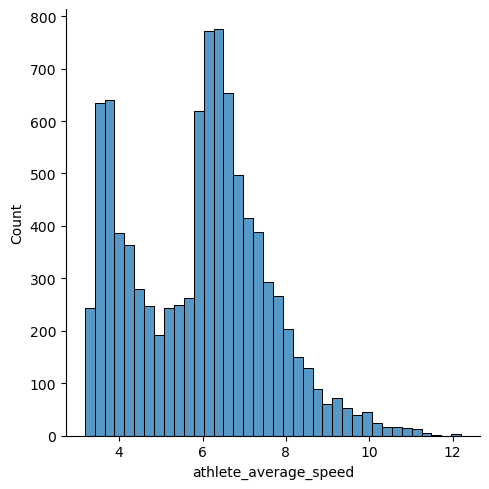

In [197]:
sns.displot(df2[df2['race_length'] == '100km']['athlete_average_speed'])

In [ ]:
sns.histplot(dfUSA2, x = 'race_length', hue = 'athlete_gender')